In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def xgb_model_init(X_train,y_train):
    xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='auc')
    xgb_clf.fit(X_train,y_train)
    
    return xgb_clf

def xgb_model_tuned(X_train,y_train):
    grid_search = {
               'max_depth': [5,8,10],
               'min_child_weight': [4],
               'learning_rate': [0.1,0.003,0.001],
               'n_estimators': [50,100]}
    clf = XGBClassifier(objective='binary:logistic', eval_metric='auc')
    grid = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
    grid.fit(X_train,y_train)
    
    xgb_model=grid.best_estimator_
    return xgb_model

In [4]:
data = pd.read_csv('preprocessing1.csv', encoding = 'cp949', index_col=0 )
seed = 5764

target=data['Status']
data.drop(['Status'],axis=1,inplace = True)

# 학습, 테스트 데이터 분리 (0.7:0.3)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=seed)

In [5]:
xgb_model = xgb_model_tuned(x_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


In [6]:
import shap 

xgb_shap_explainer = shap.TreeExplainer(xgb_model)
shap_values = xgb_shap_explainer.shap_values(x_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [7]:
shap_values.shape

(43195, 63)

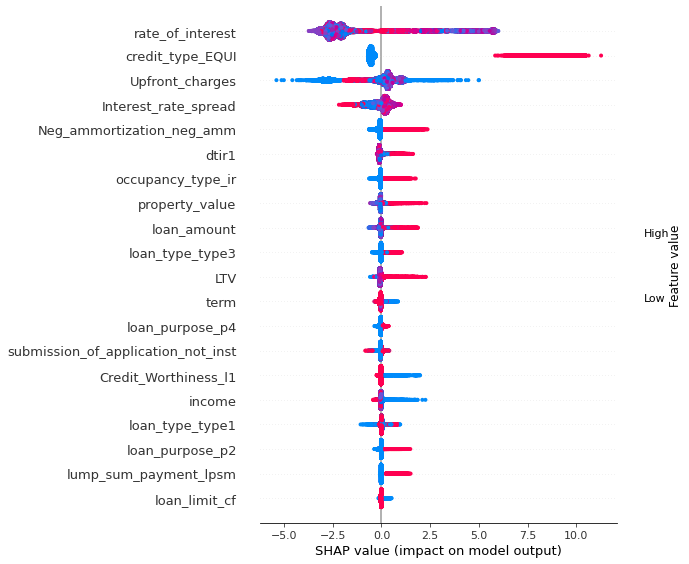

In [8]:
shap.summary_plot(shap_values, x_test)

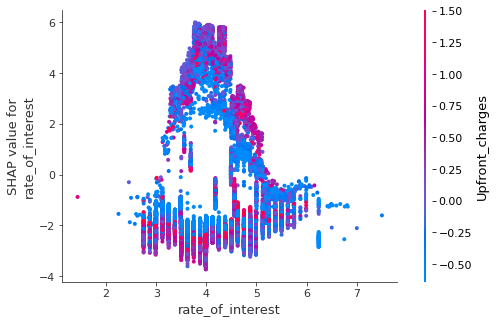

In [9]:
shap.dependence_plot('rate_of_interest', shap_values, x_test)

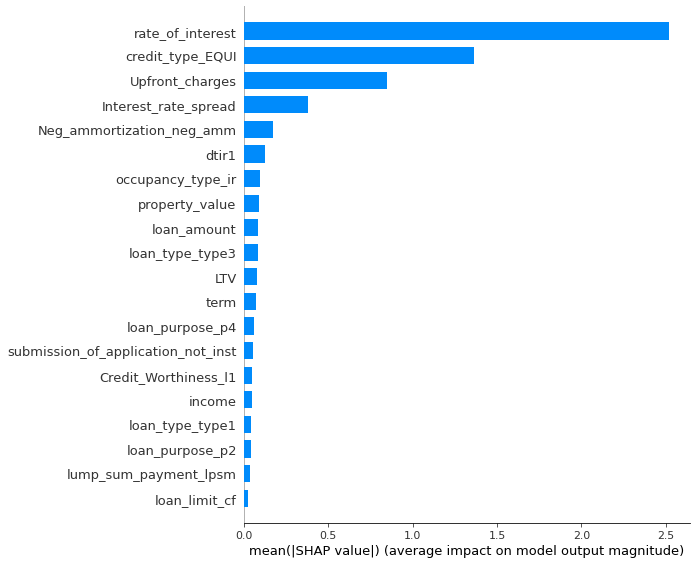

In [10]:
shap.summary_plot(shap_values, x_test,plot_type = 'bar')

In [ ]:
shap.initjs()
shap.force_plot(xgb_shap_explainer.expected_value, shap_values, x_train)